In [1]:
from src.ApylabradosModule import Pawns,Word,FrequencyTable,Board,Dictionary
import src.ApylabradosModule as ApylabradosModule
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

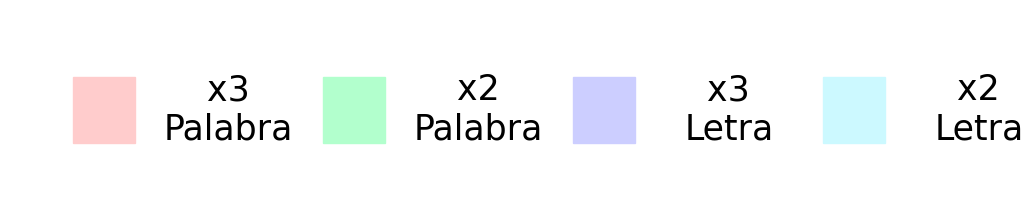

¿Que deseas hacer ?  
 
 Para continuar, introduce: ENTERWORD
 Para consultar fichar, introduce: MYPAWNS
 Para consultar puntos actuales, introduce: MYSCORE
 Para consultar puntos de cada ficha, introduce: PAWNSPOINTS
 Para obtener Ayuda con la posible palabra, introduce: HELPWORD
 Para obtener Ayuda con la Legenda, introduce: HELPLEGEND
 Para Salir del juego, introduce: QUITGAME
 
Fin del Juego
has conseguido 0 de puntos en esta partida


In [2]:
ApylabradosModule.startGame()
while not ApylabradosModule.end and ApylabradosModule.bag_of_pawns.getTotalPawns()>0:
    ApylabradosModule.showOption()
if ApylabradosModule.bag_of_pawns.getTotalPawns()<=0:
    print("¡¡¡Te has quedado sin fichas!!!")
    print("Fin del juego")
print(f"has conseguido {Board.score} de puntos en esta partida")

In [3]:
import gradio as gr
import src.ApylabradosModule as ApylabradosModule

# Inicialización del juego
ApylabradosModule.startGame()

def jugar_accion(accion, palabra=None, fila=None, columna=None, direccion=None):
    # Aquí deberías adaptar la lógica para cada acción
    if accion == "ENTERWORD":
        # Validar y colocar palabra
        # Aquí deberías usar palabra, fila, columna y dirección
        return "Palabra colocada (o mensaje de error)", "tablero.png"
    elif accion == "MYPAWNS":
        return "Tus fichas: ...", "tablero.png"
    elif accion == "MYSCORE":
        return f"Puntuación: {ApylabradosModule.Board.score}", "tablero.png"
    elif accion == "PAWNSPOINTS":
        return "Puntos de cada ficha: ...", "tablero.png"
    elif accion == "HELPWORD":
        return "Palabras posibles: ...", "tablero.png"
    elif accion == "HELPLEGEND":
        return "Leyenda del tablero: ...", "tablero.png"
    elif accion == "QUITGAME":
        return "¡Gracias por jugar!", "tablero.png"
    else:
        return "Opción no reconocida", "tablero.png"

with gr.Blocks() as demo:
    gr.Markdown("## Apailabrados")
    with gr.Row():
        # Columna izquierda: interacción con Tabs
        with gr.Column(scale=1):
            with gr.Tabs():
                with gr.TabItem("Instrucciones"):
                    gr.Markdown(ApylabradosModule.welcome())
                    gr.Markdown(ApylabradosModule.instrucciones())
                with gr.TabItem("Mis fichas"):
                    pawns_box = gr.Textbox(label="Tus fichas", interactive=False)
                    # Aquí podrías actualizar el contenido con la función correspondiente
                with gr.TabItem("Jugar"):
                    accion = gr.Dropdown(
                        choices=[
                            "ENTERWORD", "MYSCORE", "PAWNSPOINTS",
                            "HELPWORD", "HELPLEGEND", "QUITGAME"
                        ],
                        label="¿Qué deseas hacer?"
                    )
                    palabra = gr.Textbox(label="Palabra (si aplica)", visible=False)
                    fila = gr.Number(label="Fila (si aplica)", visible=False)
                    columna = gr.Number(label="Columna (si aplica)", visible=False)
                    direccion = gr.Dropdown(choices=["V", "H"], label="Dirección (si aplica)", visible=False)
                    btn = gr.Button("Enviar")
                    salida = gr.Textbox(label="Salida")
        # Columna derecha: tablero
        with gr.Column(scale=2):
            tablero = gr.Image(value="images/tablero.png", label="Tablero")
            legenda = gr.Image(value='images/legend.png', label='legend')

    # Mostrar u ocultar campos según la acción seleccionada
    def mostrar_campos(accion):
        if accion == "ENTERWORD":
            return {palabra: gr.update(visible=True),
                    fila: gr.update(visible=True),
                    columna: gr.update(visible=True),
                    direccion: gr.update(visible=True)}
        else:
            return {palabra: gr.update(visible=False),
                    fila: gr.update(visible=False),
                    columna: gr.update(visible=False),
                    direccion: gr.update(visible=False)}

    accion.change(mostrar_campos, inputs=accion, outputs=[palabra, fila, columna, direccion])
    btn.click(jugar_accion, inputs=[accion, palabra, fila, columna, direccion], outputs=[salida, tablero])

demo.launch()


* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.
